In [99]:
#Importing packages
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import math

In [100]:
# Reading in data we cleaned
df = pd.read_csv('data/exported_data.csv')

In [101]:
df.head()

,Democrats 2016,Republicans 2016,Democrats 2012,Republicans 2012,State,County,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment % 2016,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per
0,33.264033,62.176022,45.084746,53.587571,Michigan,"Presque Isle County, Michigan",14.7,85.3,97.05,0.2,0.30,13.85,9.6,14.7,393475,14.3,4.7,0.070504,0.037034,0.033471,0.193137,0.097412,0.095725,0.376055,0.185824,0.190231,0.360304,0.178417,0.181886
1,41.088014,53.565475,50.177448,48.576131,Michigan,"Calhoun County, Michigan",12.9,87.1,80.65,1.6,10.45,8.35,4.8,16.8,5594998,18.8,6.5,0.118989,0.061094,0.057895,0.308407,0.151431,0.156975,0.352965,0.173308,0.179657,0.219640,0.096424,0.123215
2,28.744694,66.858702,40.316090,58.523357,Michigan,"Branch County, Michigan",13.4,86.6,90.35,0.6,3.05,8.05,4.8,16.8,1245185,14.1,4.8,0.101433,0.054194,0.047239,0.309689,0.170651,0.139038,0.362648,0.189468,0.173180,0.226230,0.103059,0.123171
3,36.855246,56.491599,51.061492,47.394519,Michigan,"Shiawassee County, Michigan",10.7,89.3,95.45,0.3,0.45,12.05,5.3,12.0,1602095,14.9,5.6,0.110296,0.057764,0.052533,0.289581,0.146615,0.142966,0.379568,0.186526,0.193042,0.220555,0.099090,0.121465
4,34.247700,61.432326,43.482538,55.697655,Michigan,"Mackinac County, Michigan",10.9,89.1,76.80,0.6,1.65,13.85,9.9,13.7,616120,20.1,7.6,0.078798,0.043072,0.035726,0.220924,0.114079,0.106845,0.384307,0.193322,0.190985,0.315971,0.155036,0.160935


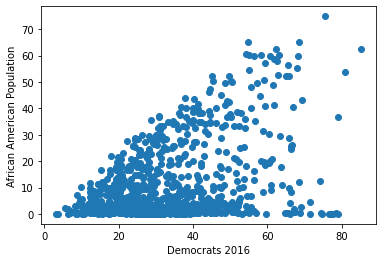

In [102]:
# Looking at some plots of features against our target
fig, ax = plt.subplots()
plt.scatter(df['Democrats 2016'], df['African American Population'])
ax.set_xlabel("Democrats 2016")
ax.set_ylabel("African American Population")
plt.show()

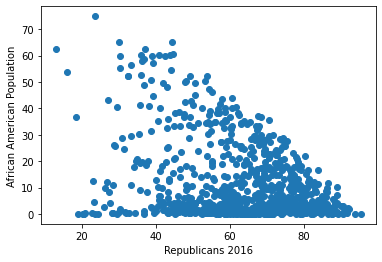

In [103]:
fig, ax = plt.subplots()
plt.scatter(df['Republicans 2016'], df['African American Population'])
ax.set_xlabel("Republicans 2016")
ax.set_ylabel("African American Population")
plt.show()

In [104]:
# tranforms gdp so its more linear
df['log_gdp'] = np.log10(df['realGDP2016'])

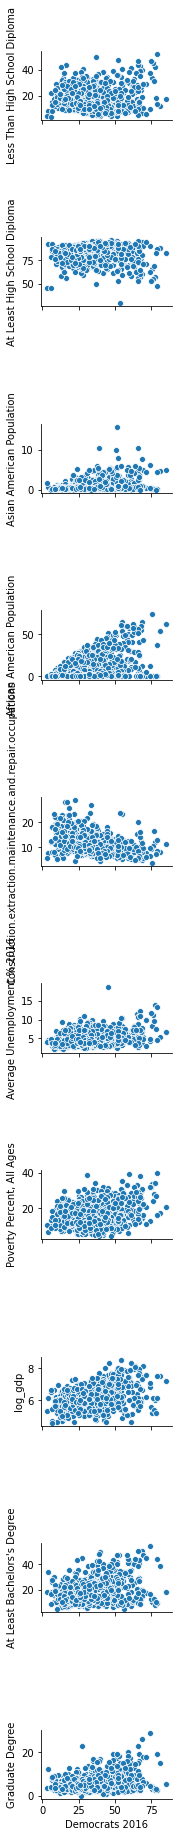

In [105]:
sns.pairplot(data=df,
                  x_vars=['Democrats 2016'],
                  y_vars=['Less Than High School Diploma', 'At Least High School Diploma', 
                          'Asian American Population','African American Population',
                          'Construction.extraction.maintenance.and.repair.occupations',
                         'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                          "At Least Bachelors's Degree", 
                         'Graduate Degree'])

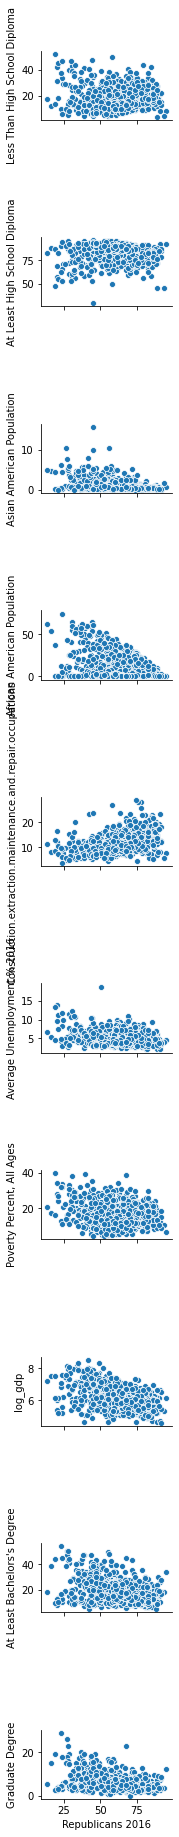

In [106]:
sns.pairplot(data=df,
                  x_vars=['Republicans 2016'],
                  y_vars=['Less Than High School Diploma', 'At Least High School Diploma', 
                          'Asian American Population','African American Population',
                          'Construction.extraction.maintenance.and.repair.occupations',
                         'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp',
                          "At Least Bachelors's Degree" , 'Graduate Degree'])

In [107]:
df.head()

,Democrats 2016,Republicans 2016,Democrats 2012,Republicans 2012,State,County,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment % 2016,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
0,33.264033,62.176022,45.084746,53.587571,Michigan,"Presque Isle County, Michigan",14.7,85.3,97.05,0.2,0.30,13.85,9.6,14.7,393475,14.3,4.7,0.070504,0.037034,0.033471,0.193137,0.097412,0.095725,0.376055,0.185824,0.190231,0.360304,0.178417,0.181886,5.594917
1,41.088014,53.565475,50.177448,48.576131,Michigan,"Calhoun County, Michigan",12.9,87.1,80.65,1.6,10.45,8.35,4.8,16.8,5594998,18.8,6.5,0.118989,0.061094,0.057895,0.308407,0.151431,0.156975,0.352965,0.173308,0.179657,0.219640,0.096424,0.123215,6.747800
2,28.744694,66.858702,40.316090,58.523357,Michigan,"Branch County, Michigan",13.4,86.6,90.35,0.6,3.05,8.05,4.8,16.8,1245185,14.1,4.8,0.101433,0.054194,0.047239,0.309689,0.170651,0.139038,0.362648,0.189468,0.173180,0.226230,0.103059,0.123171,6.095234
3,36.855246,56.491599,51.061492,47.394519,Michigan,"Shiawassee County, Michigan",10.7,89.3,95.45,0.3,0.45,12.05,5.3,12.0,1602095,14.9,5.6,0.110296,0.057764,0.052533,0.289581,0.146615,0.142966,0.379568,0.186526,0.193042,0.220555,0.099090,0.121465,6.204688
4,34.247700,61.432326,43.482538,55.697655,Michigan,"Mackinac County, Michigan",10.9,89.1,76.80,0.6,1.65,13.85,9.9,13.7,616120,20.1,7.6,0.078798,0.043072,0.035726,0.220924,0.114079,0.106845,0.384307,0.193322,0.190985,0.315971,0.155036,0.160935,5.789665


In [108]:
# This is our set of features WITHOUT including the percentage of vote share each party won in 2012 in each 
# county. Through this model we are able to see how effective external factors are in predicting the voting
# tendencies of counties. 
df_features = df[['Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population','Construction.extraction.maintenance.and.repair.occupations',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per',
                  '65tot_per','65M_per','65F_per']]

In [109]:
# Creating train test split, using all variables
x_train, x_test, y_train, y_test = train_test_split(df_features, df['Democrats 2016'],
                                                    test_size=0.2,shuffle=True)

In [110]:
# SIMPLE linear regression without cross validation
model = LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
test_score = model.score(x_test,y_test)
train_score = model.score(x_train,y_train)
print("Train score: "+str(train_score))
print("Test score: "+str(test_score))

Train score: 0.6026129434772824
Test score: 0.4795843151415832


In [111]:
mse = mean_squared_error(y_test,predictions)
print("Mean squared error: "+str(mse))


Mean squared error: 105.5861197955693


In [112]:
#Now lets use cross validation to get a better estimate of test score 
scores = cross_validate(model,x_train,y_train,cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),return_train_score=True) 


In [113]:
#defining functions to print out scores and mses for cross validation sets
def print_r2(s):
    print("Training R^2: "+str(s['train_r2']))
    print("\nTest R^2: "+str(s['test_r2']))
    
def print_mse(s):
    print("Training negative MSE: "+str(s['train_neg_mean_squared_error']))
    print("\nTesting negative MSE: "+str(s['test_neg_mean_squared_error']))

In [114]:
print_r2(scores)

Training R^2: [0.61496377 0.61291656 0.60515339 0.59796025 0.59342269]

Test R^2: [0.50098175 0.53759875 0.58063415 0.59150021 0.62609062]


In [115]:
print_mse(scores)

Training negative MSE: [-71.50177223 -77.24240592 -74.59709581 -75.43357865 -78.83361886]

Testing negative MSE: [-106.33754554  -72.99355076  -83.3976865   -81.37017791  -67.30391927]


While this model does not give good results in terms of the r^2 values and the mse, it serves as a good baseline to compare our next models to. Using just demographic and economic characteristics of counties can explain about 55% of the variation in the percentage of votes that the democratic candidate will recieve in that county

In [116]:
# this set of features includes all from above as well as the percentage vote share for each party in 2012
df_features2 = df[['Democrats 2012', 'Republicans 2012','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population','Construction.extraction.maintenance.and.repair.occupations',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per','65tot_per',
             '65M_per','65F_per']]

In [117]:
x_train, x_test, y_train, y_test = train_test_split(df_features2, df['Democrats 2016'],
                                                    test_size=0.2,shuffle=True)
model = LinearRegression()
scores2 = cross_validate(model,x_train,y_train,cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),return_train_score=True) 


In [118]:
print_r2(scores2)

Training R^2: [0.98169871 0.97948887 0.98076392 0.98026895 0.98034794]

Test R^2: [0.97286571 0.98151164 0.97739358 0.98013574 0.97791899]


In [119]:
print_mse(scores2)

Training negative MSE: [-3.57803038 -3.89902893 -3.73997258 -3.84065624 -3.54183665]

Testing negative MSE: [-4.62260931 -3.5631242  -4.00967934 -3.50438953 -5.17303752]


We can see this model is significantly better than our previous model as is expected.

In [120]:
# now let's see how a model preforms with just the percentage vote share from 2012 as our features
df_features3 = df[['Democrats 2012', 'Republicans 2012']]
x_train, x_test, y_train, y_test = train_test_split(df_features3, df['Democrats 2016'], 
                                                    test_size=0.2,shuffle=True)
model = LinearRegression()
scores3 = cross_validate(model,x_train,y_train,cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),return_train_score=True) 



In [121]:
print_r2(scores3)

Training R^2: [0.87452444 0.88435133 0.89247719 0.88822706 0.88718361]

Test R^2: [0.9194321  0.8878252  0.85548942 0.87104995 0.87592229]


In [122]:
print_mse(scores3)

Training negative MSE: [-23.53388223 -23.0109551  -21.19502255 -22.70361214 -22.09704317]

Testing negative MSE: [-18.58626249 -20.74804888 -27.97484294 -21.98766046 -24.39109835]


We can see that this model outpreforms our original model that did not include the previous percentage vote share but it preforms worse than the model that contains all the demographic and economic features as well as the percentage vote share. This indicates that we should investigate using a combination of these features and that the demographic and economic features do contribute to increasing our models accuracy. 

In [125]:
# Now we are investigating a less complex model 
# We will drop the percentage of population in certain age groups broken down by gender, but include the 
# overall percentages for age groups still
df_features4 = df[['Democrats 2012', 'Republicans 2012','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]
x_train_main, x_test_main, y_train_main, y_test_main = train_test_split(df_features4, df['Democrats 2016'], 
                                                        test_size=0.2, shuffle=True)
model = LinearRegression()
scores_4 = cross_validate(model,x_train_main,y_train_main,cv=5,                    
                          scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)



In [126]:
print_r2(scores_4)

Training R^2: [0.97846234 0.9801449  0.97852331 0.97795587 0.98001611]

Test R^2: [0.97744109 0.96928652 0.97939478 0.9803853  0.97265525]


In [127]:
print_mse(scores_4)

Training negative MSE: [-4.19384849 -4.04242422 -4.11490572 -4.16285219 -4.05467896]

Testing negative MSE: [-4.56400469 -5.14431572 -4.43090087 -4.30030351 -4.65650162]


Comparing the r^2s and the mse values of this model to the one that included all the features, we can see that they are very very similar. This indicates to us that this, less complex, model preforms about the same. Thus we will precede with this subset of features because it is generally preferable to use a less complex model(sparsity). 

In [128]:
# Now we will break it down by geographical subsets to see if we can improve scores
# first we will look at a group of states in the midwest
midwest = ["Michigan","Minnesota","Ohio","Wisconsin","Iowa"]
df_midwest = df[df.State.isin(midwest)]
df_midwest.head()

,Democrats 2016,Republicans 2016,Democrats 2012,Republicans 2012,State,County,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment % 2016,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
0,33.264033,62.176022,45.084746,53.587571,Michigan,"Presque Isle County, Michigan",14.7,85.3,97.05,0.2,0.30,13.85,9.6,14.7,393475,14.3,4.7,0.070504,0.037034,0.033471,0.193137,0.097412,0.095725,0.376055,0.185824,0.190231,0.360304,0.178417,0.181886,5.594917
1,41.088014,53.565475,50.177448,48.576131,Michigan,"Calhoun County, Michigan",12.9,87.1,80.65,1.6,10.45,8.35,4.8,16.8,5594998,18.8,6.5,0.118989,0.061094,0.057895,0.308407,0.151431,0.156975,0.352965,0.173308,0.179657,0.219640,0.096424,0.123215,6.747800
2,28.744694,66.858702,40.316090,58.523357,Michigan,"Branch County, Michigan",13.4,86.6,90.35,0.6,3.05,8.05,4.8,16.8,1245185,14.1,4.8,0.101433,0.054194,0.047239,0.309689,0.170651,0.139038,0.362648,0.189468,0.173180,0.226230,0.103059,0.123171,6.095234
3,36.855246,56.491599,51.061492,47.394519,Michigan,"Shiawassee County, Michigan",10.7,89.3,95.45,0.3,0.45,12.05,5.3,12.0,1602095,14.9,5.6,0.110296,0.057764,0.052533,0.289581,0.146615,0.142966,0.379568,0.186526,0.193042,0.220555,0.099090,0.121465,6.204688
4,34.247700,61.432326,43.482538,55.697655,Michigan,"Mackinac County, Michigan",10.9,89.1,76.80,0.6,1.65,13.85,9.9,13.7,616120,20.1,7.6,0.078798,0.043072,0.035726,0.220924,0.114079,0.106845,0.384307,0.193322,0.190985,0.315971,0.155036,0.160935,5.789665


In [129]:
df_features_midwest = df_midwest[['Democrats 2012', 'Republicans 2012','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]
x_train, x_test, y_train, y_test = train_test_split(df_features_midwest, df_midwest['Democrats 2016'], 
                                                    test_size=0.2,shuffle=True)
model = LinearRegression()
scores_midwest = cross_validate(model,x_train,y_train,cv=5,
                                scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)   

In [130]:
print_r2(scores_midwest)

Training R^2: [0.96077049 0.96205609 0.95433349 0.96348433 0.95714136]

Test R^2: [0.95541244 0.92935384 0.94127441 0.94250441 0.9591912 ]


In [131]:
print_mse(scores_midwest)

Training negative MSE: [-3.76556949 -3.61157512 -4.12935887 -3.50385119 -3.56182451]

Testing negative MSE: [-3.44875398 -5.2760978  -5.79223809 -4.4159995  -5.10375073]


In [132]:
# now we will look at southern states
south = ["Florida","Texas","Georgia","Arizona"]
df_south = df[df.State.isin(south)]
df_south.head()

,Democrats 2016,Republicans 2016,Democrats 2012,Republicans 2012,State,County,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment % 2016,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
83,47.494950,48.995648,47.769323,51.381820,Florida,"Duval County, Florida",12.8,87.2,58.00,3.80,28.85,9.80,4.9,14.5,54932423,24.9,8.0,0.119038,0.061204,0.057834,0.375322,0.184902,0.190420,0.333032,0.158291,0.174741,0.172608,0.073872,0.098736,7.739829
84,28.952191,68.615692,33.704786,65.217391,Florida,"Franklin County, Florida",21.7,78.3,80.20,0.70,12.65,15.35,4.3,23.1,326130,18.8,5.5,0.086921,0.056398,0.030524,0.326258,0.219729,0.106529,0.323833,0.172226,0.151607,0.262988,0.132909,0.130079,5.513391
85,47.474970,49.916507,53.540280,45.682655,Florida,"St. Lucie County, Florida",16.6,83.4,63.45,1.55,17.50,13.65,5.8,17.0,7824890,17.8,6.3,0.092861,0.048053,0.044807,0.279555,0.137036,0.142519,0.335787,0.160468,0.175319,0.291796,0.135928,0.155868,6.893478
86,60.384573,35.744045,58.681188,40.438589,Florida,"Orange County, Florida",13.1,86.9,47.85,4.55,19.20,9.60,4.3,16.3,81146561,30.3,9.6,0.139616,0.068430,0.071186,0.399467,0.199577,0.199890,0.315060,0.153339,0.161721,0.145857,0.063567,0.082290,7.909270
87,24.169284,73.673334,28.577568,70.640309,Florida,"Bradford County, Florida",23.6,76.4,73.40,0.50,20.20,13.95,4.2,18.6,608141,8.6,3.9,0.097987,0.058848,0.039139,0.343118,0.211938,0.131180,0.334644,0.182257,0.152388,0.224251,0.097566,0.126685,5.784004


In [133]:
df_features_south = df_south[['Democrats 2012', 'Republicans 2012','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]
x_train, x_test, y_train, y_test = train_test_split(df_features_south, df_south['Democrats 2016'], 
                                                    test_size=0.2,shuffle=True)
model = LinearRegression()
scores_south = cross_validate(model,x_train,y_train,cv=5,
                              scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)   


In [134]:
print_r2(scores_south)


Training R^2: [0.98742989 0.98675455 0.98746466 0.98772345 0.98974033]

Test R^2: [0.98769826 0.98928643 0.98764272 0.98649294 0.97350092]


In [135]:
print_mse(scores_south)

Training negative MSE: [-3.32271732 -3.50631828 -3.33440123 -3.24981357 -2.94072849]

Testing negative MSE: [-3.52085393 -3.08063298 -3.48551726 -3.85007587 -5.22105231]


In [136]:
# Now northeast states
northeast = ["North Carolina","Pennsylvania"]
df_northeast = df[df.State.isin(northeast)]
df_northeast.head()

,Democrats 2016,Republicans 2016,Democrats 2012,Republicans 2012,State,County,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment % 2016,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
150,59.392554,37.411176,60.158844,38.818969,Pennsylvania,"Delaware County, Pennsylvania",9.5,90.5,72.80,4.50,18.55,7.75,4.9,10.8,29291807,34.7,14.5,0.130446,0.065478,0.064967,0.316355,0.154363,0.161992,0.352134,0.167976,0.184158,0.201066,0.084142,0.116924,7.466746
151,28.607199,68.271853,38.857778,59.684362,Pennsylvania,"Wayne County, Pennsylvania",13.3,86.7,92.65,0.65,2.55,13.75,5.7,13.7,1456959,17.9,7.3,0.086419,0.047789,0.038630,0.262029,0.153723,0.108306,0.373482,0.195266,0.178217,0.278069,0.134349,0.143719,6.163447
152,24.658451,70.699634,36.813797,61.512849,Pennsylvania,"Bradford County, Pennsylvania",14.6,85.4,96.85,0.55,0.45,10.60,6.5,11.5,5160201,15.7,5.1,0.096000,0.048956,0.047043,0.268766,0.134068,0.134698,0.373237,0.186576,0.186661,0.261997,0.122212,0.139785,6.712667
153,50.217053,46.819155,63.090343,35.795541,Pennsylvania,"Lackawanna County, Pennsylvania",12.5,87.5,91.45,1.35,1.95,8.30,5.6,14.1,8666241,23.7,9.0,0.113048,0.055507,0.057541,0.297003,0.149153,0.147850,0.347751,0.169513,0.178239,0.242198,0.102502,0.139695,6.937831
154,29.581000,67.329267,40.063774,58.095694,Pennsylvania,"Cambria County, Pennsylvania",12.4,87.6,93.70,0.55,3.35,10.05,6.8,15.6,4476405,17.5,6.5,0.114567,0.059572,0.054995,0.262625,0.133809,0.128816,0.357793,0.178864,0.178929,0.265015,0.114493,0.150522,6.650929


In [137]:
df_features_northeast = df_northeast[['Democrats 2012', 'Republicans 2012','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per'
             ,'2544tot_per','4564tot_per','65tot_per']]
x_train, x_test, y_train, y_test = train_test_split(df_features_northeast, df_northeast['Democrats 2016'], 
                                                    test_size=0.2,shuffle=True)
model = LinearRegression()
scores_northeast = cross_validate(model,x_train,y_train,cv=5,
                                  scoring=('r2', 'neg_mean_squared_error'),return_train_score=True) 

In [138]:
print_r2(scores_northeast)

Training R^2: [0.98804641 0.9888872  0.98771177 0.98801555 0.98974797]

Test R^2: [0.98438195 0.97627059 0.98538411 0.98489869 0.97369876]


In [139]:
print_mse(scores_northeast)

Training negative MSE: [-2.36170718 -1.96567581 -2.04607907 -2.39137011 -1.76884884]

Testing negative MSE: [-1.87201126 -4.66515628 -3.63467248 -1.72693032 -5.84361713]


In general, it seems that subsetting by geographical location of states does not change the r^2 or the mse values very much. The model for the midwest subset did seem to drop in accuracy a little but it is difficult to see if these changes are statistically significant or not. This indicates that states in different geographical areas are not different enough to skew the accuracy of a model trained across many different regions. We can investigate how these geographical models preforms on data from 2020 to get further information here.

In [140]:
# now lets visualize the predictions against the true values
# I will use the model on all the states (i.e. not the geographical subsets)

model = LinearRegression()
y_pred = cross_val_predict(model, x_train_main, y_train_main, cv=5)


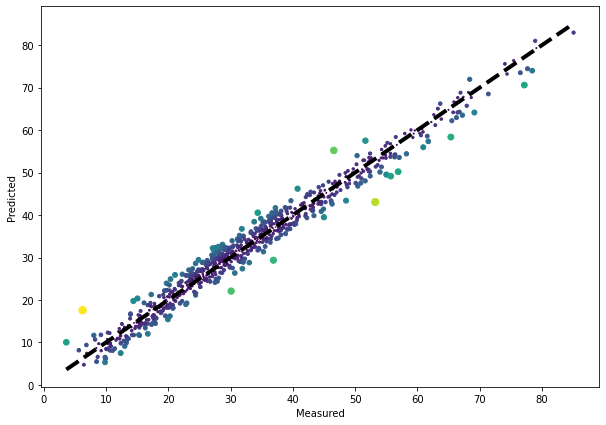

In [141]:
#Scatter plot
diff = abs(y_train_main-y_pred)*5
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(y_train_main, y_pred, s = diff, c = diff)
ax.plot([y_train_main.min(), y_train_main.max()], [y_train_main.min(), y_train_main.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Text(0, 0.5, 'Frequency')

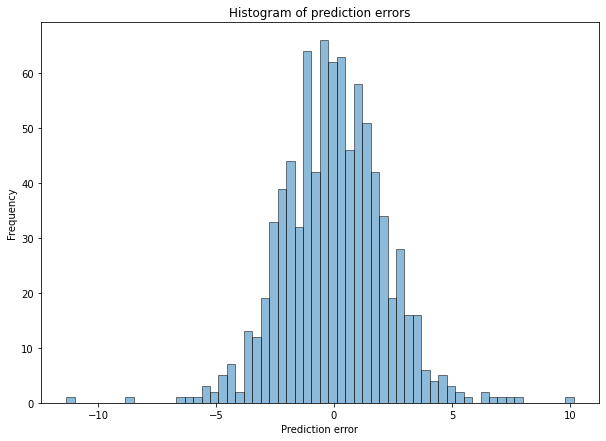

In [158]:
diff = y_train_main-y_pred
fig, ax = plt.subplots(figsize = (10,7))
counts,bins,patches = ax.hist(diff,bins = 60, histtype = 'bar', ec = 'black', alpha = 0.5)
#ax.set_xticks(bins)
#plt.xticks(rotation = 'vertical')
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

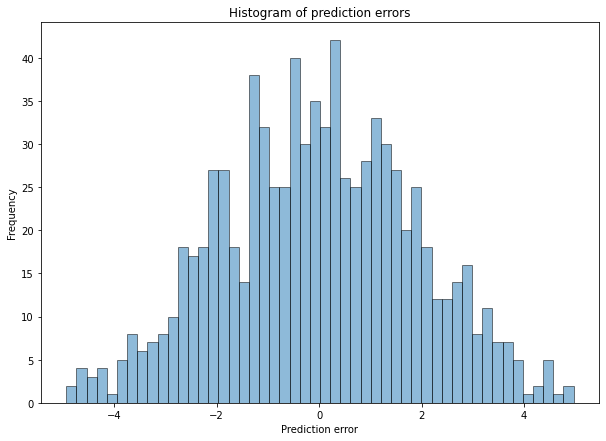

In [159]:
diff_2 = [x for x in diff if (abs(x)) < 5]
fig, ax = plt.subplots(figsize = (10,7))
counts,bins,patches = ax.hist(diff_2,bins = 50, histtype = 'bar', ec = 'black', alpha = 0.5)
#ax.set_xticks(bins)
#plt.xticks(rotation = 'vertical')
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

In [153]:
#import statistics
diff_sq = (y_train_main-y_pred)
mean = np.mean(diff_sq)
se = np.std(diff_sq)
interval = 1.96*se
lower_bound = mean - interval
upper_bound = mean + interval
print("Confidence interval: ["+str(lower_bound)+", "+str(upper_bound)+"]")

Confidence interval: [-4.215002358830447, 4.209928526773395]


#finish midterm report